In [1]:
import pandas as pd   #импортируем необходимые для работы библиотеки
import numpy as np
import matplotlib.pyplot as plt

#### Датасет содержит информацию о покупателях беговых дорожек и состоит из следующих переменных:
**Product** - модель беговой дорожки, 
**Age** - возраст покупателя, 
**Gender** - пол покупателя, 
**Education** - кол-во лет полученного образования, 
**Marital Status** - семейное положение, 
**Usage** - среднее планируемое кол-во раз использования беговой дорожки в неделю; 
**Fitness** - самооценка физической формы по шкале от 1 до 5 (где 1 - плохая форма, а 5 - отличная форма); 
**Income** - годовой доход домохозяйства (в $); 
**Miles** - среднее планируемое кол-во миль, которое покупатель собирается проходить/пробегать каждую неделю.

In [2]:
df = pd.read_csv('C:\dataset/CardioGoodFitness.csv')   #загружаем выбранный датасет
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [3]:
df['MaritalStatus'] = df['MaritalStatus'] == 'Partnered'   #для удобства перекодируем строковое значение в бинарную переменную

Теперь, если покупатель одинок в переменной MaritalStatus мы запишем False, а если он состоит в браке - True.

In [4]:
df.head(10)   #посмотрим на первые десять строк датасета

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,False,3,4,29562,112
1,TM195,19,Male,15,False,2,3,31836,75
2,TM195,19,Female,14,True,4,3,30699,66
3,TM195,19,Male,12,False,3,3,32973,85
4,TM195,20,Male,13,True,4,2,35247,47
5,TM195,20,Female,14,True,3,3,32973,66
6,TM195,21,Female,14,True,3,3,35247,75
7,TM195,21,Male,13,False,3,3,32973,85
8,TM195,21,Male,15,False,5,4,35247,141
9,TM195,21,Female,15,True,2,3,37521,85


In [5]:
df.info()   #вызываем метод info для того, чтобы узнать содержит ли наш датасет пропущенные значения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    bool  
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: bool(1), int64(6), object(2)
memory usage: 11.6+ KB


In [6]:
df.shape  #узнаем размерность нашего датасета

(180, 9)

Вызвав функцию shape мы узнали, что наш датасет содержит 180 строк. Вызвав функцию info мы узнали, что каждый из имеющихся столбцов содержит 180 ненулевых значений. Это значит, что в нашем датасете нет пропущенных значений. Это хорошо)

In [7]:
df['Product'].unique()   #узнаем какие модели беговых дорожек включены в наш датасет

array(['TM195', 'TM498', 'TM798'], dtype=object)

Датасет включает в себя информацию по покупателям, совершившим покупку одной из трех моделей беговых дорожек - TM195, TM498 и TM798. Нам не так важны их названия, для дальнейшего исследования нам важно, что их три и они разные.

<AxesSubplot:>

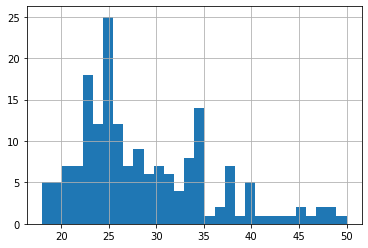

In [8]:
df['Age'].hist(bins=30)   #построим гистограмму для того, чтобы посмотреть на распределение покупателей по возрасту

In [9]:
df['Age'].mode()   #расчет моды

0    25
Name: Age, dtype: int64

In [10]:
df['Age'].median() #расчет медианы

26.0

In [11]:
df['Age'].mean()   #расчет среднего арифметического

28.788888888888888

На графике распределения видно, что наиболее часто встречающееся значение возраста покупателей беговых дорожек - 25 лет. Мы подтвердили это, выполним расчет моды. Посчитали и другие меры центральной тенденции - медиану и среднее арифметическое. 

In [12]:
df_age = pd.DataFrame(df.groupby('Age')['Income'].mean()) #с помощью группировки выделим нужные нам данные в отдельный датасет

<AxesSubplot:xlabel='Age'>

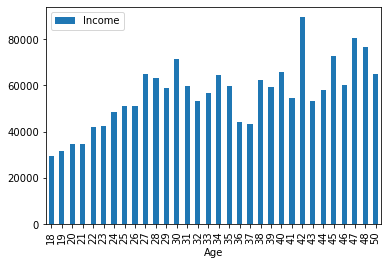

In [13]:
df_age.plot(kind='bar')   #построим гистограмму для того, чтобы посмотреть на распределение среднего дохода по возрасту

In [14]:
df_age['Income'].max() - df_age['Income'].min()   #размах

60079.0

In [15]:
np.percentile(df_age['Income'],75) - np.percentile(df_age['Income'],25)   #интерквартильный размах

17143.375

In [16]:
print(df_age['Income'].var(ddof=0))   #дисперсия генеральной совокупности 
print(df_age['Income'].std(ddof=0))   #среднеквадратическое отклонение генеральной совокупности

192443389.0958969
13872.39666012679


На графике распределения среднего дохода по возрасту видно, что оно неравномерное, нет однозначной зависимости между возрастом и уровнем дохода. Также мы посчитали меры разброса (вариативности) для дохода.

#### Вопрос: Какая из моделей беговых дорожек была наиболее востребована среди покупателей? А какая наименее востребована?

Для того, чтобы ответить на этот вопрос используем **группировку данных в pandas**.

In [17]:
df.groupby('Product').size()   #используем группировку по модели беговой дорожки

Product
TM195    80
TM498    60
TM798    40
dtype: int64

<AxesSubplot:>

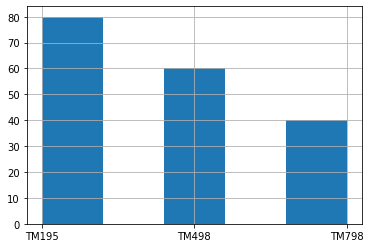

In [18]:
df['Product'].hist(bins=5)   #строим гистограмму для наглядности

**Вывод**: Наиболее востребована среди покупателей модель TM195 - ее предпочли купить 80 человек. Наименее востребована модель TM798 - ее купили лишь 40 человек.

#### Вопрос: Каков средний доход покупателей той или иной моделей беговых дорожек?

Для того, чтобы ответить на этот вопрос используем **группировку данных в pandas**.

In [19]:
df.groupby('Product')['Income'].mean()   #рассчитаем средний доход покупателей той или иной модели беговых дорожек

Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64

<AxesSubplot:xlabel='Product'>

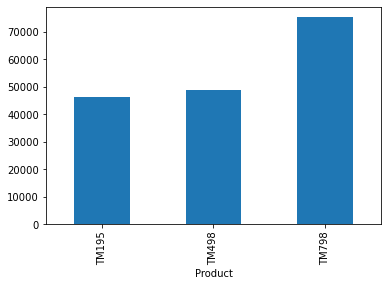

In [20]:
df.groupby('Product')['Income'].mean().plot(kind='bar')   #отобразим на графике

**Вывод**: У покупателей модели TM195 самый низкий средний уровень дохода, а у покупателей модели ТМ798 - самый высокий. При этом ранее мы выяснили, что ТМ798 купили в два раза меньше, чем ТМ195. Значит, дело в цене, потребители совершили покупку той модели, которую могли себе позволить.

#### Вопрос: Правда ли, что покупатели беговой дорожки, оценивающие свою физическую форму как хорошую или отличную, в среднем планируют проходить/пробегать больше миль за неделю?

Для того, чтобы ответить на этот вопрос используем **Z-оценку**.

In [21]:
import scipy.stats   #импортируем необходимую статистическую библиотеку

In [22]:
needed_columns = ['Product','Fitness','Miles']   #выделяем нужные колонки в датасете и записываем их в отдельный датасет
df_z = df[needed_columns]
df_z.head()

,Product,Fitness,Miles
0,TM195,4,112
1,TM195,3,75
2,TM195,3,66
3,TM195,3,85
4,TM195,2,47


In [23]:
df_z['z-score'] = scipy.stats.zscore(df_z['Miles'])   #рассчитываем z-оценку и добавляем эту колонку в созданный датасет
df_z.head()

C:\Users\alina\AppData\Local\Temp\ipykernel_17532\461602484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_z['z-score'] = scipy.stats.zscore(df_z['Miles'])   #рассчитываем z-оценку и добавляем эту колонку в созданный датасет


,Product,Fitness,Miles,z-score
0,TM195,4,112,0.170257
1,TM195,3,75,-0.545143
2,TM195,3,66,-0.719159
3,TM195,3,85,-0.351792
4,TM195,2,47,-1.086527


<AxesSubplot:>

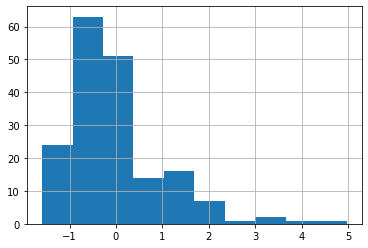

In [24]:
df_z['z-score'].hist()    #посмотрим на распределение z-оценки

In [25]:
df_z[df_z['z-score'] > 2]   #есть ли покупатели, которые планируют проходить/пробегать миль больше чем 2 стандартных отклонения?

,Product,Fitness,Miles,z-score
84,TM498,4,212,2.103769
155,TM798,5,240,2.645153
166,TM798,5,300,3.805260
167,TM798,5,280,3.418558
170,TM798,5,260,3.031855
173,TM798,5,360,4.965368


In [26]:
df_z.groupby('Fitness')['z-score'].mean()   #смотрим на среднюю z-оценку для каждой из групп физической подготовки

Fitness
1   -1.337883
2   -0.995800
3   -0.309534
4    0.549708
5    1.464463
Name: z-score, dtype: float64

**Вывод**: Это правда. В среднем клиенты, оценивающие свою физическую форму как хорошую (4) и отличную (5) планируют проходить/пробегать больше миль за неделю.

#### Вопрос: Содержат ли наши данные экстремальные значения по параметру дохода? Если да, то есть ли схожие характеристики у покупателей, на которые они приходятся?

Для того, чтобы ответить на этот вопрос используем **нахождение выбросов через интервартильный размах**.

In [27]:
df['Income'].describe()   #вызываем описательную статистику для параметра, по которому будем искать выбросы

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [28]:
q3 = np.percentile(df['Income'], 75)   #cохраним значения 1-ого и 3-ого перцентилей в переменные
q1 = np.percentile(df['Income'], 25)
print (q3, q1)

58668.0 44058.75


In [29]:
iqr = q3 - q1   #найдем интерквартильный размах
print(iqr)

14609.25


In [30]:
iqr_threshold_bottom = q1 - 1.5 * iqr   #найдем нижнюю и верхнюю границы, для того чтобы понять что мы будем считать за выбросы
iqr_threshold_top = q3 + 1.5 * iqr
print (iqr_threshold_bottom, iqr_threshold_top)

22144.875 80581.875


Нижний порог оказался ниже минимального значения. В распределении переменной дохода не будет выбросов слева от медианы. А справа выбросы будут.

In [31]:
df[df['Income'] > iqr_threshold_top].shape   #найдем кол-во выбросов - 19

(19, 9)

In [32]:
df[df['Income'] > iqr_threshold_top]['Product'].value_counts()   #проверим на какую модель беговой дорожки приходятся выбросы

TM798    19
Name: Product, dtype: int64

In [33]:
df[df['Income'] > iqr_threshold_top]['Gender'].value_counts()   #проверим на какой пол покупателей приходятся выбросы

Male      16
Female     3
Name: Gender, dtype: int64

In [34]:
df[df['Income'] > iqr_threshold_top]['MaritalStatus'].value_counts()   #проверим на какой семейное положени приходятся выбросы

True     13
False     6
Name: MaritalStatus, dtype: int64

**Вывод**: Данные содержат экстремальные значения по параметру дохода, они находятся справа от медианы и характеризуют наших покупателей с высоким доходом. С помощью группировки мы выяснили, что эти люди - преимущественно женатые мужчины, которые предпочитают исключительно модель TM798. Это полезное знание для нас, как для маркетологов - для того, чтобы охватить наиболее платящую аудиторию нам необходимо таргетировать на них рекламу именно этой модели.

#### Вопрос: Содержат ли наши данные экстремальные значения по параметру образования (кол-во лет)? Если да, то есть ли схожие характеристики у покупателей, на которые они приходятся?

Для того, чтобы ответить на этот вопрос используем другой способ нахождения выбросов - **через среднеквадратичное отклонение**.

In [35]:
df['Education'].describe()   #вызываем описательную статистику для параметра, по которому будем искать выбросы

count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

In [36]:
mean = df['Education'].mean()  #найдем и cохраним значения ср.арифметического и среднекв.отклонения в переменные
std = df['Education'].std()
print (mean, std)

15.572222222222223 1.6170548978065553


In [37]:
std_threshold_bottom = mean - 2.5 * std  #найдем нижнюю и верхнюю границы, для понимания как определять выбросы
std_threshold_top = mean + 2.5 * std
print (std_threshold_bottom, std_threshold_top)

11.529584977705834 19.61485946673861


Нижний порог оказался ниже минимального значения. В распределении переменной образования не будет выбросов слева от медианы. А справа выбросы будут.

In [38]:
df[df['Education'] > std_threshold_top].shape   #найдем кол-во выбросов - 4

(4, 9)

**Вывод**: Данные содержат экстремальные значения по параметру образования, они находятся справа от медианы и характеризуют наших покупателей с предположительно высоким уровнем образования (так как они обучались больше среднего кол-ва лет). Однако, таких значения всего 4, исследовать характеристики таких покупателей нет необходимости.

#### Вопрос: Рассмотрим зависимости между переменными, характеризующими покупателей беговых дорожек. Какая зависимость самая слабая, а какая самая сильная?

Для того, чтобы ответить на этот вопрос будем искать **корреляцию** между переменными.

In [39]:
df.corr()  # быстрый метод, но не имеет большого смысла, если в датасете не только количественные переменные

,Age,Education,MaritalStatus,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.192152,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.068569,0.395155,0.410581,0.625827,0.307284
MaritalStatus,0.192152,0.068569,1.000000,-0.007786,-0.050751,0.150293,0.025639
Usage,0.015064,0.395155,-0.007786,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,-0.050751,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.150293,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.025639,0.759130,0.785702,0.543473,1.000000


In [40]:
chisl_columns = ['Age', 'Education','Usage','Fitness', 'Income','Miles']   #возьмем только количественные переменные датасета
df_chisl = df[chisl_columns]   #и создадим новый датасет
df_chisl.head()

,Age,Education,Usage,Fitness,Income,Miles
0,18,14,3,4,29562,112
1,19,15,2,3,31836,75
2,19,14,4,3,30699,66
3,19,12,3,3,32973,85
4,20,13,4,2,35247,47


In [41]:
df_chisl.corr()   #применим функцию corr к новому датасету

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


In [42]:
corr = df_chisl.corr()   # выведем коэф-ты корреляции в другом виде
corr.unstack().sort_values()  # отсортируем, чтобы найти самую слабую и самую сильную корреляции

Usage      Age          0.015064
Age        Usage        0.015064
           Miles        0.036618
Miles      Age          0.036618
Age        Fitness      0.061105
Fitness    Age          0.061105
Age        Education    0.280496
Education  Age          0.280496
Miles      Education    0.307284
Education  Miles        0.307284
           Usage        0.395155
Usage      Education    0.395155
Education  Fitness      0.410581
Fitness    Education    0.410581
Age        Income       0.513414
Income     Age          0.513414
           Usage        0.519537
Usage      Income       0.519537
Income     Fitness      0.535005
Fitness    Income       0.535005
Income     Miles        0.543473
Miles      Income       0.543473
Education  Income       0.625827
Income     Education    0.625827
Usage      Fitness      0.668606
Fitness    Usage        0.668606
Usage      Miles        0.759130
Miles      Usage        0.759130
           Fitness      0.785702
Fitness    Miles        0.785702
Age       

<AxesSubplot:xlabel='Fitness', ylabel='Miles'>

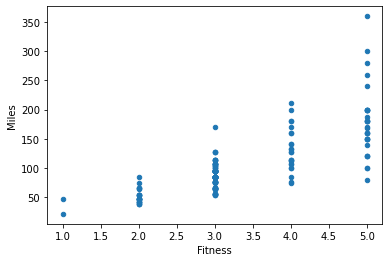

In [43]:
df.plot('Fitness','Miles',kind='scatter')   #строим график рассеяния для самой сильной корреляции

**Вывод**: Самая слабая зависимость наблюдается между параметрами возраста и кол-ва раз использования беговой дорожки в неделю. Самая высокая зависимость наблюдается между параметрами состояния физической формы и предполагаемого кол-ва пройденных миль. Однако ее нельзя назвать сильной (весьма высокой), так как она не попадает в диапазон от 0.9 до 1.0. Коэф-т корреляции положительный, что свидетельствует о том, что с увеличением значения одного из признаков значения другого признака тоже увеличивается.

#### Вопрос: Правда ли, что беговую дорожку модели ТМ798, которую предпочитают покупать более состоятельные люди (как мы выяснили ранее), используют в среднем чаще?

Для того, чтобы ответить на этот вопрос будет удобно **визуализировать** наши переменные. Используем следующие переменные - модель беговой дорожки, возраст, среднее предполагаемое кол-во раз использования в неделю.

In [44]:
sost = df.groupby(['Product','Age'])['Usage'].mean()   #с помощью группировки создадим нужный нам набор данных
sost

Product  Age
TM195    18     3.00
         19     3.00
         20     3.50
         21     3.25
         22     3.25
                ... 
TM798    40     6.00
         42     5.00
         45     5.00
         47     4.00
         48     4.00
Name: Usage, Length: 68, dtype: float64

Text(0.5, 0.98, 'Среднее использование дорожки в неделю в зависимости от возраста по моделям')

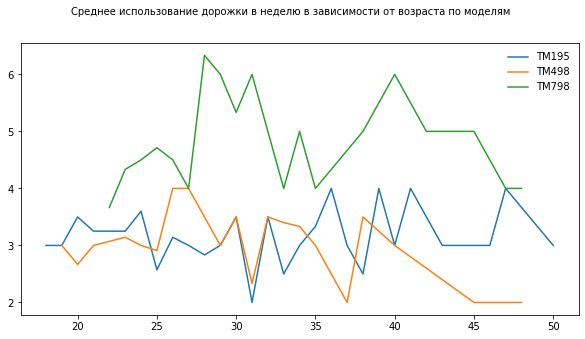

In [45]:
fig, ax = plt.subplots(figsize=(10,5))   #строим линейный график
ax.plot(sost.loc['TM195'])
ax.plot(sost.loc['TM498'])
ax.plot(sost.loc['TM798'])
ax.legend(['TM195','TM498','TM798'], frameon=False)
fig.suptitle('Среднее использование дорожки в неделю в зависимости от возраста по моделям',fontsize=10)

**Вывод**: Правда. Беговую дорожку модели TM798 в среднем в неделю используют чаще, чем другие модели дорожек, в независимости от возраста. Можем предположить, что эта дорожка обладает такими характеристиками, которые удовлетворяют требованиям профессиональных спортсменов - на ней планируют заниматься не реже 4-х раз в неделю, что не свойственно любительскому спорту и обычным людям. Это еще одна характеристика, которая поможет нам, как маркетологам, определить ЦА для этой модели дорожки и таргетировать ее на правильную аудиторию.

#### Вопрос: Правда ли, что мужчины в среднем проходят/пробегают больше миль при одинаковой частоте использования, чем женщины?

Для того, чтобы ответить на этот вопрос будет удобно **визуализировать** наши переменные. Используем следующие переменные - пол, возраст, предполагаемое кол-во раз использования в неделю, среднее кол-во пройденных миль. Попробуем построить два отдельных графика - для женщин и для мужчин.

In [46]:
average_miles = df.groupby(['Gender','Usage'])['Miles'].mean()
average_miles

Gender  Usage
Female  2         59.450000
        3         80.696970
        4        102.000000
        5        157.285714
        6        230.000000
Male    2         57.153846
        3         85.916667
        4        125.184211
        5        163.100000
        6        206.000000
        7        240.000000
Name: Miles, dtype: float64

Text(0.5, 0.98, 'Среднее кол-во пройденных миль в зависимости от частоты использования среди женщин и мужчин')

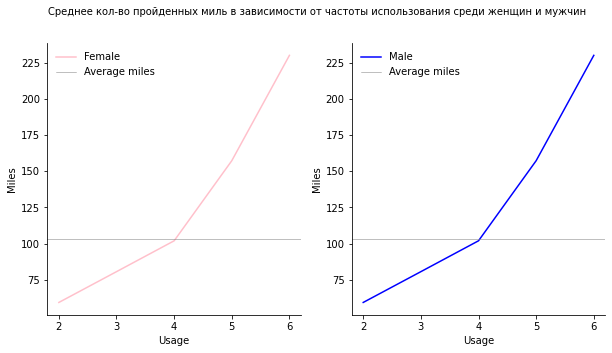

In [47]:
fig, ax = plt.subplots(1,2, figsize=(10,5))   #строим линейные графики - отдельно для женщин и мужчин
ax[0].plot(average_miles.loc['Female'], c='pink')
ax[1].plot(average_miles.loc['Female'], c='blue')

for axis in ax.ravel():
    axis.set_xlabel('Usage')
    axis.set_ylabel('Miles')
    axis.axhline(103.2, c='grey', lw=0.5)  #среднее значение = 103,2 мили узнали с помощью функции describe
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    
ax[0].legend(['Female','Average miles'], frameon=False)
ax[1].legend(['Male','Average miles'], frameon=False)

fig.suptitle('Среднее кол-во пройденных миль в зависимости от частоты использования среди женщин и мужчин',fontsize=10)

**Вывод**: Неправда. Визуализировав графики мы видим, что среднее кол-во миль и у мужчин, и у женщин набирается примерно одинаково по мере возрастания частоты использования. При этом общее среднее значение кол-ва миль у обоих полов достигается примерно во время 4-ой за неделю тренировке на беговой дорожке.